In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000840889"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000840889
SIC,6029
Description,"COMMERCIAL BANKS, NEC"
Name,DORAL FINANCIAL CORP
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,3.0,3.856667e+00,1.436431e-01,3.75,3.775000e+00,3.8,3.910000e+00,4.020000e+00
interest income,5.0,1.155550e+08,3.490965e+07,89738000.00,9.010900e+07,91117000.0,1.463990e+08,1.604120e+08
net income,6.0,4.285938e+07,7.382335e+07,-30155000.00,1.140475e+06,8070500.0,9.338700e+07,1.505140e+08
net interest income,7.0,4.702526e+07,2.338723e+07,56800.00,4.565650e+07,48247000.0,5.960750e+07,7.034500e+07
provision for loan losses,6.0,1.104838e+07,1.602021e+07,21300.00,4.960000e+05,5461500.0,1.247075e+07,4.169800e+07


# Plots

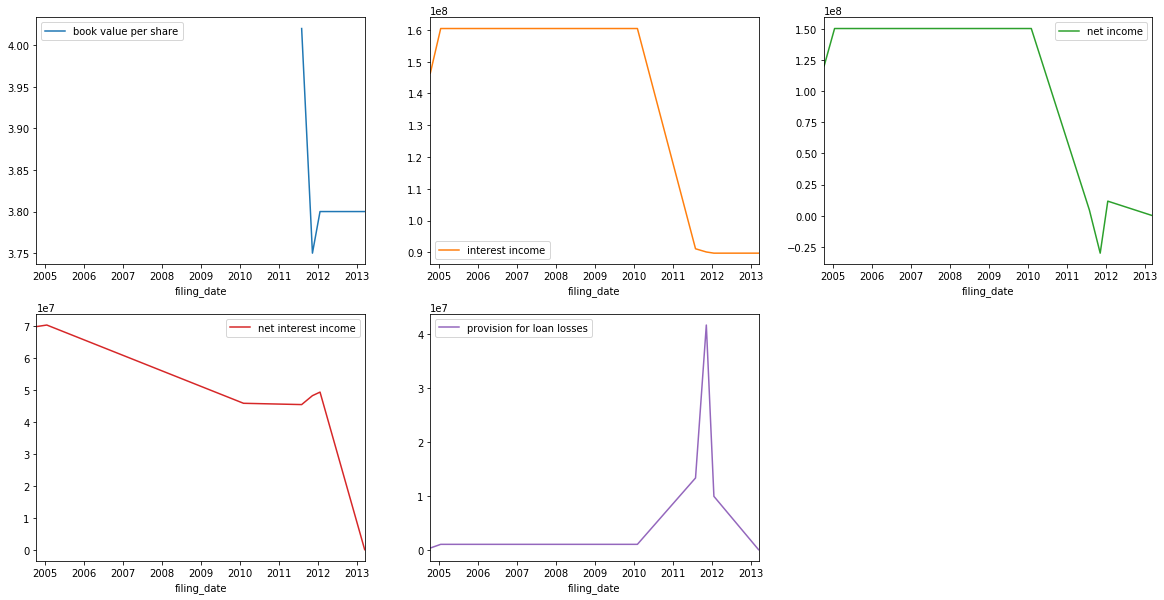

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000840889 book value per share       2004Q3 to 2011Q1: 27 periods  missing   
           book value per share        2012Q1 to 2012Q4: 4 periods  missing   
           interest income            2005Q1 to 2011Q1: 25 periods  missing   
           interest income             2012Q1 to 2012Q4: 4 periods  missing   
           net income                 2005Q1 to 2011Q1: 25 periods  missing   
           net income                  2012Q1 to 2012Q3: 3 periods  missing   
           net interest income        2005Q1 to 2009Q3: 19 periods  missing   
           net interest income         2010Q1 to 2011Q1: 5 periods  missing   
           net interest income         2012Q1 to 2012Q3: 3 periods  missing   
           provision for loan losses  2005Q1 to 2011Q1: 25 periods  missing   
           provision for loan losses   2012Q1 to 2012Q3: 3 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000840889 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()